Saving image2.jpg to image2 (1).jpg
Original Image:


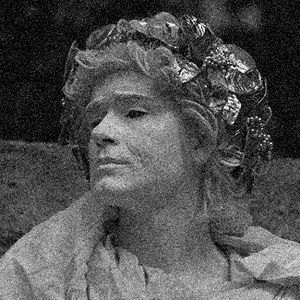


Grayscale Image:


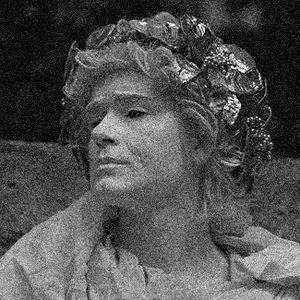


Blurred Image:


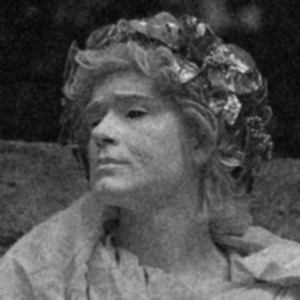


Brightness and Contrast Adjusted Image:


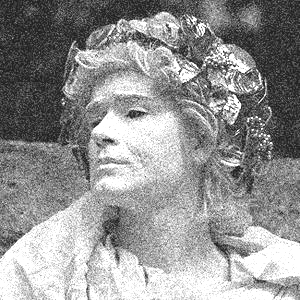


Histogram Equalized Grayscale Image:


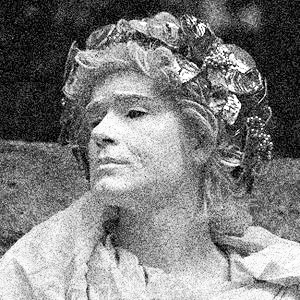


Sharpened Image:


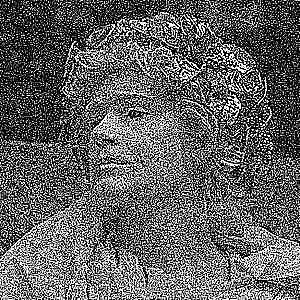

In [18]:


from google.colab import files
from google.colab.patches import cv2_imshow #for displaying images

import cv2
import numpy as np

# Upload image from local drive
uploaded = files.upload()

# the uploaded file is an image (e.g., .jpg, .png)
# Get the first uploaded filename (assuming only one file is uploaded for simplicity)
image_filename = next(iter(uploaded))

# Read the image using OpenCV
img = cv2.imread(image_filename)

if img is None:
    print(f"Error: Could not read the image from {image_filename}")
else:
    # Display the original image
    print("Original Image:")
    cv2_imshow(img)

    # --- Image Enhancement using OpenCV ---

    # Example 1: Convert to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("\nGrayscale Image:")
    cv2_imshow(gray_img)

    # Example 2: Apply Gaussian Blur for noise reduction
    # Kernel size (5, 5) - adjust as needed
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    print("\nBlurred Image:")
    cv2_imshow(blurred_img)

    # Example 3: Adjust Brightness and Contrast
    # alpha: contrast control (1.0-3.0)
    # beta: brightness control (0-100)
    alpha = 1.5  # Increase contrast
    beta = 30   # Increase brightness
    enhanced_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    print("\nBrightness and Contrast Adjusted Image:")
    cv2_imshow(enhanced_img)

    # Example 4: Histogram Equalization (best on grayscale images)
    equalized_gray_img = cv2.equalizeHist(gray_img)
    print("\nHistogram Equalized Grayscale Image:")
    cv2_imshow(equalized_gray_img)

    # Example 5: Apply sharpening kernel (unsharp masking concept)
    # Define a sharpening kernel
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)
    print("\nSharpened Image:")
    cv2_imshow(sharpened_img)

    # You can add more enhancement techniques here based on your needs:
    # - Edge Detection (e.g., Canny)
    # - Thresholding (e.g., Otsu's)
    # - morphological operations (erosion, dilation)

    # To save the enhanced image (e.g., the blurred image)
    # cv2.imwrite('blurred_' + image_filename, blurred_img)
    # files.download('blurred_' + image_filename) # Download the saved file


In [19]:
# prompt: now code for all evaluation metrics of obtained image and all detailes of image obtained

import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from math import log10, sqrt
import cv2 # Added missing import for cv2

# Function to calculate PSNR
def calculate_psnr(original, enhanced):
    mse = np.mean((original - enhanced) ** 2)
    if mse == 0:
        return 100  # PSNR is infinity when there is no error
    max_pixel = 255.0
    psnr_value = 20 * log10(max_pixel / sqrt(mse))
    return psnr_value

# Function to calculate SSIM
def calculate_ssim(original, enhanced):
    # SSIM requires grayscale images for comparison usually
    if len(original.shape) > 2:
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        enhanced_gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    else:
        original_gray = original
        enhanced_gray = enhanced

    ssim_value, _ = ssim(original_gray, enhanced_gray, full=True)
    return ssim_value

if 'img' in locals() and img is not None: # Added check for img existence
    print("\n--- Image Details ---")
    print(f"Image Filename: {image_filename}") # Assumes image_filename is defined
    print(f"Image Shape (Height, Width, Channels): {img.shape}")
    print(f"Image Data Type: {img.dtype}")
    print(f"Image Size (bytes): {img.size}")

    print("\n--- Evaluation Metrics ---")

    # Compare original image with grayscale image (as an example enhancement)
    # Note: PSNR and SSIM are typically used for comparing reconstructed/enhanced images
    # to a ground truth. Comparing color to grayscale is not a standard use case,
    # but we can do it for demonstration by converting the original to grayscale.
    if len(img.shape) > 2:
        original_gray_for_metrics = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        original_gray_for_metrics = img # If original was already grayscale

    print("\nMetrics for Grayscale Image:")
    # Ensure images have the same data type and dimensions for metrics
    if 'gray_img' in locals() and original_gray_for_metrics.shape == gray_img.shape and original_gray_for_metrics.dtype == gray_img.dtype: # Added check for gray_img existence
      psnr_gray = calculate_psnr(original_gray_for_metrics, gray_img)
      ssim_gray = calculate_ssim(original_gray_for_metrics, gray_img)
      print(f"  PSNR: {psnr_gray:.2f}")
      print(f"  SSIM: {ssim_gray:.4f}")
    else:
      print("  Cannot calculate metrics for Grayscale Image due to shape/dtype mismatch with original (converted to gray) or gray_img not found.")


    print("\nMetrics for Blurred Image:")
    # Ensure images have the same data type and dimensions for metrics
    # Convert original image to the same type and dimensions as blurred_img if necessary
    if 'blurred_img' in locals(): # Added check for blurred_img existence
        original_for_blurred_metrics = img.astype(blurred_img.dtype)
        if original_for_blurred_metrics.shape == blurred_img.shape:
            psnr_blurred = calculate_psnr(original_for_blurred_metrics, blurred_img)
            ssim_blurred = calculate_ssim(original_for_blurred_metrics, blurred_img)
            print(f"  PSNR: {psnr_blurred:.2f}")
            print(f"  SSIM: {ssim_blurred:.4f}")
        else:
            print("  Cannot calculate metrics for Blurred Image due to shape mismatch with original.")
    else:
        print("  Blurred Image not found.")


    print("\nMetrics for Brightness and Contrast Adjusted Image:")
    # Ensure images have the same data type and dimensions for metrics
    if 'enhanced_img' in locals(): # Added check for enhanced_img existence
        original_for_enhanced_metrics = img.astype(enhanced_img.dtype)
        if original_for_enhanced_metrics.shape == enhanced_img.shape:
            psnr_enhanced = calculate_psnr(original_for_enhanced_metrics, enhanced_img)
            ssim_enhanced = calculate_ssim(original_for_enhanced_metrics, enhanced_img)
            print(f"  PSNR: {psnr_enhanced:.2f}")
            print(f"  SSIM: {ssim_enhanced:.4f}")
        else:
            print("  Cannot calculate metrics for Brightness/Contrast Adjusted Image due to shape mismatch with original.")
    else:
        print("  Brightness and Contrast Adjusted Image not found.")


    print("\nMetrics for Histogram Equalized Grayscale Image:")
    # Compare equalized grayscale image with the original grayscale image
    if 'equalized_gray_img' in locals() and original_gray_for_metrics.shape == equalized_gray_img.shape and original_gray_for_metrics.dtype == equalized_gray_img.dtype: # Added check for equalized_gray_img existence
        psnr_equalized = calculate_psnr(original_gray_for_metrics, equalized_gray_img)
        ssim_equalized = calculate_ssim(original_gray_for_metrics, equalized_gray_img)
        print(f"  PSNR: {psnr_equalized:.2f}")
        print(f"  SSIM: {ssim_equalized:.4f}")
    else:
        print("  Cannot calculate metrics for Histogram Equalized Grayscale Image due to shape/dtype mismatch with original (converted to gray) or equalized_gray_img not found.")


    print("\nMetrics for Sharpened Image:")
    # Ensure images have the same data type and dimensions for metrics
    if 'sharpened_img' in locals(): # Added check for sharpened_img existence
        original_for_sharpened_metrics = img.astype(sharpened_img.dtype)
        if original_for_sharpened_metrics.shape == sharpened_img.shape:
            psnr_sharpened = calculate_psnr(original_for_sharpened_metrics, sharpened_img)
            ssim_sharpened = calculate_ssim(original_for_sharpened_metrics, sharpened_img)
            print(f"  PSNR: {psnr_sharpened:.2f}")
            print(f"  SSIM: {ssim_sharpened:.4f}")
        else:
            print("  Cannot calculate metrics for Sharpened Image due to shape mismatch with original.")
    else:
        print("  Sharpened Image not found.")


--- Image Details ---
Image Filename: image2 (1).jpg
Image Shape (Height, Width, Channels): (300, 300, 3)
Image Data Type: uint8
Image Size (bytes): 270000

--- Evaluation Metrics ---

Metrics for Grayscale Image:
  PSNR: 100.00
  SSIM: 1.0000

Metrics for Blurred Image:
  PSNR: 29.14
  SSIM: 0.5411

Metrics for Brightness and Contrast Adjusted Image:
  PSNR: 26.96
  SSIM: 0.7202

Metrics for Histogram Equalized Grayscale Image:
  PSNR: 27.68
  SSIM: 0.8223

Metrics for Sharpened Image:
  PSNR: 28.05
  SSIM: 0.3223
